<a href="https://colab.research.google.com/github/Vicky-57/Flower-Species-Classification/blob/main/Flower_Species_Classification_vikas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv(' ',header =None)

In [ ]:
# https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png

In [ ]:
# apply column name on data set
col = ['sepal length','sepal width', 'petal length','petal width','Species']

In [ ]:
df.columns =col
df

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# perform EDA
# train test split
# select any / ALL classification algo ( Logistic regression , KNN , SVM)
# evaluate model (confusion matrix , accuracy score , precision , recall ,f1 score)
# tune the model


In [ ]:
#label Encoder
fruits= ['Apple',
         'apple',
         'Banana',
         'Cherry',
         'Orange',
         'Coconut']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
new_fruits = le.fit_transform(fruits)

In [ ]:
new_fruits

array([0, 5, 1, 2, 4, 3])

In [ ]:
# EDA
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# count of null value
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Species         0
dtype: int64

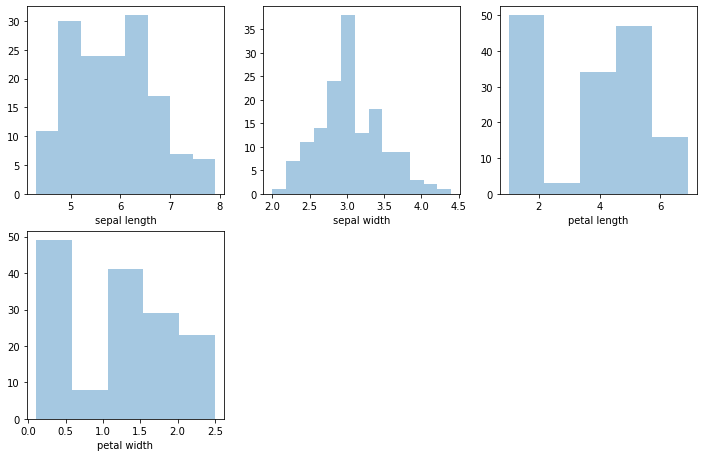

In [ ]:
# Histogram
col = df.columns
plt.figure(figsize=(12,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df[col[i]],kde=False)
plt.show()

In [ ]:
# Now focus on diff class
df_0 = df[df.Species=='Iris-setosa']
df_1 = df[df.Species=='Iris-versicolor']
df_2 = df[df.Species=='Iris-virginica']

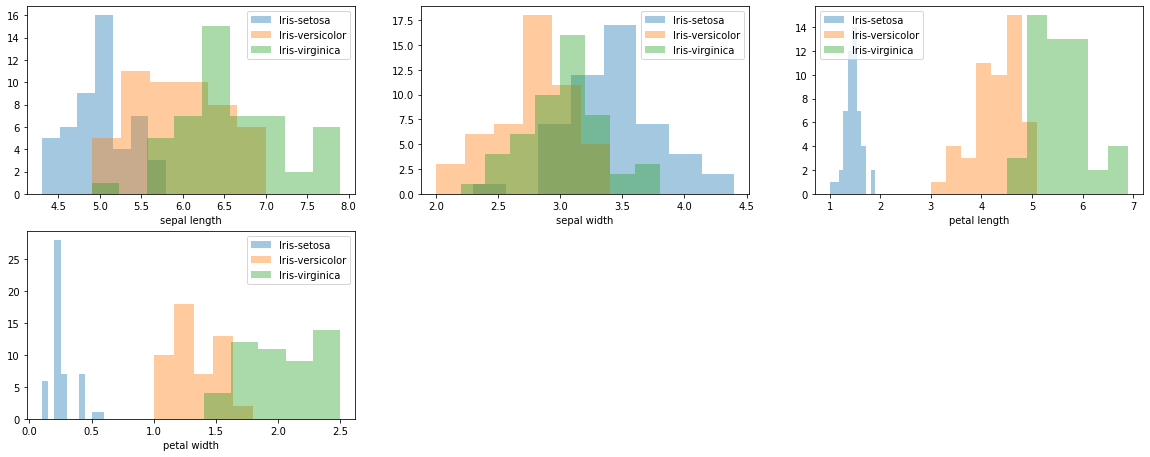

In [ ]:
#histogram after classification
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df_0[col[i]],kde=False, label='Iris-setosa')
  sns.distplot(df_1[col[i]],kde=False, label='Iris-versicolor')
  sns.distplot(df_2[col[i]],kde=False, label='Iris-virginica')
  plt.legend()
plt.show()

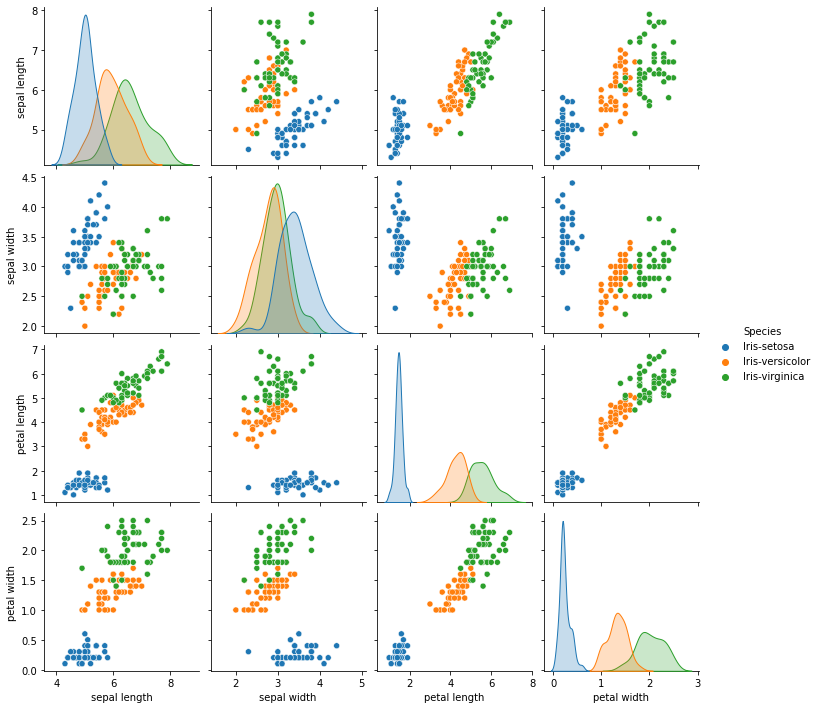

In [ ]:
#Pairwise bivariate distribution
sns.pairplot(df, hue= 'Species')

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

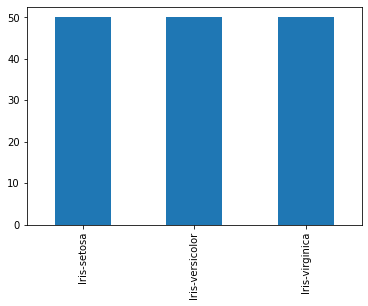

In [ ]:
df.Species.value_counts().plot(kind='bar')

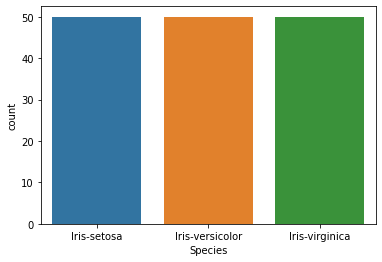

In [ ]:
#Count plot
sns.countplot(x='Species', data=df)

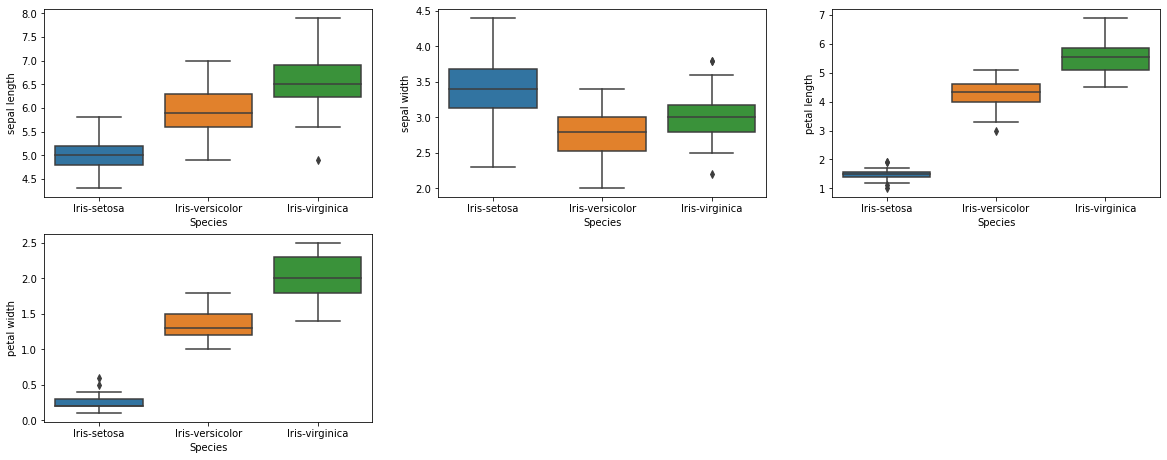

In [ ]:
#Analyse to column with respect to Outcome
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.boxplot(x='Species', y=col[i], data=df)
plt.show()

In [ ]:
#Model creation
x= df.iloc[:,0:4]
y= df.iloc[:,4:]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
#test train split
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9,random_state=18)

In [ ]:
x_train.head()

,sepal length,sepal width,petal length,petal width
143,6.8,3.2,5.9,2.3
73,6.1,2.8,4.7,1.2
107,7.3,2.9,6.3,1.8
68,6.2,2.2,4.5,1.5
75,6.6,3.0,4.4,1.4


# **Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#Training
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
#Prediction for the test data on the basis of training
pred=model.predict(x_test)
pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', '

## **Model evaluation**

In [ ]:
#Logistic regression model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy of Logistic Regression Model :' , accuracy_score(y_test,pred)*100,'%')

Accuracy of Logistic Regression Model : 94.81481481481482 %


In [ ]:
confusion_matrix(y_test,pred)

array([[47,  0,  0],
       [ 0, 41,  3],
       [ 0,  4, 40]])

**KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier()

In [ ]:
#Training
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Prediction for the test data on the basis of training
pred1=model1.predict(x_test)
pred1

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Ir

In [ ]:
#KNN model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy of KNN Model :' , accuracy_score(y_test,pred1)*100,'%')

Accuracy of KNN Model : 96.29629629629629 %


In [ ]:
confusion_matrix(y_test,pred1)

array([[47,  0,  0],
       [ 0, 40,  4],
       [ 0,  1, 43]])

# ***Parameter tuning ***

In [ ]:
#Hyper parameter tuning - change in value of k
k = np.arange(3,75,2)
k

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73])

In [ ]:
# distance metric
dis=['manhattan','euclidean' ,'hamming']
accu1=[]
for i in dis:
  model2= KNeighborsClassifier(n_neighbors=9,metric=i)
  model2.fit(x_train , y_train)
  pred1 = model2.predict(x_test)
  # storing accuracy in the list
  accu1.append(accuracy_score(y_test,pred1))

accu1

[0.5481481481481482, 0.5555555555555556, 0.5037037037037037]

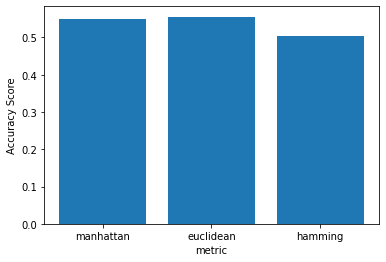

In [ ]:
plt.bar(dis,accu1)
plt.xlabel('metric')
plt.ylabel('Accuracy Score')
plt.show()

## SVM

In [ ]:
# support vector machine classifier
from sklearn.svm import SVC
model2=SVC()

In [ ]:
#Training
model2.fit(x_train,y_train)

SVC()

In [ ]:
pred2=model2.predict(x_test)
pred2

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'

# **MODEL** EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print('Accuracy of Model :' , accuracy_score(y_test,pred2)*100,'%')

Accuracy of Model : 91.11111111111111 %


In [ ]:
confusion_matrix(y_test,pred2)

array([[47,  0,  0],
       [ 0, 42,  2],
       [ 0, 10, 34]])

# Hyper Parameter Tuning

In [ ]:
k= ['rbf' , 'linear']
accu_k=[]
for i in k:
  model= SVC(kernel=i)
  model.fit(x_train , y_train)
  pred = model.predict(x_test)
  accu_k.append(accuracy_score(y_test,pred)*100)
accu_k

[91.11111111111111, 94.81481481481482]

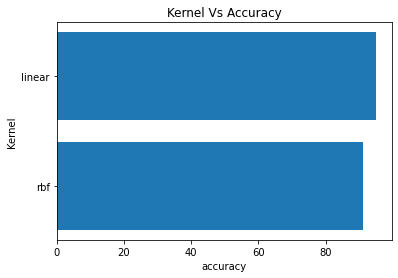

In [ ]:
plt.barh(k,accu_k)
plt.ylabel('Kernel')
plt.xlabel('accuracy')
plt.title('Kernel Vs Accuracy')
plt.show()

In [ ]:
k= [0.1,1,10,100]
accu_k=[]
for i in k:
  model= SVC(kernel='linear',C=i)
  model.fit(x_train , y_train)
  pred = model.predict(x_test)
  accu_k.append(accuracy_score(y_test,pred)*100)
accu_k

[91.11111111111111, 94.81481481481482, 95.55555555555556, 96.29629629629629]

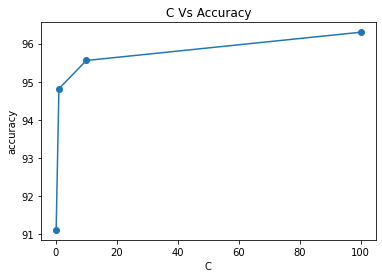

In [ ]:
plt.plot(k,accu_k,marker='o')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('C Vs Accuracy')
plt.show()

In [ ]:
k= [10,1,0.1,0.01]
accu_k=[]
for i in k:
  model= SVC(C=1,gamma=i)
  model.fit(x_train , y_train)
  pred = model.predict(x_test)
  accu_k.append((accuracy_score(y_test,pred)*100))
accu_k

[52.59259259259259, 95.55555555555556, 91.11111111111111, 56.2962962962963]

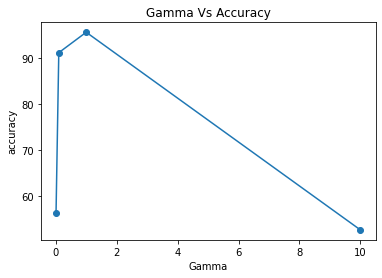

In [ ]:
plt.plot(k,accu_k,marker='o')
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.title('Gamma Vs Accuracy')
plt.show()

# DECISION **Tree**